# Introduction to Time Series Analysis

#### Thanks to datacamp for providing this tutorial on Time Series analysis. You can check this it from this [link]('https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial') - 

### Import required pandas library.

In [32]:
import pandas as pd

### Import the data set from [this]('https://raw.githubusercontent.com/datacamp/datacamp_facebook_live_ny_resolution/master/data/multiTimeline.csv') location 

In [33]:
trend=pd.read_csv('https://raw.githubusercontent.com/datacamp/datacamp_facebook_live_ny_resolution/master/data/multiTimeline.csv'
                 ,skiprows=1)

### Print first 5 rows for the data.

In [34]:
trend.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


### Change the columns name to Diet, Gym, Finance

In [35]:
trend.columns=['Month','Diet','Gym','Finance']

In [36]:
trend.head()

,Month,Diet,Gym,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


### Print the data type of each column

In [37]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month      168 non-null object
Diet       168 non-null int64
Gym        168 non-null int64
Finance    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


### Change the Month columns data type to have date time features

In [38]:
trend.Month=pd.to_datetime(trend['Month'])

In [39]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month      168 non-null datetime64[ns]
Diet       168 non-null int64
Gym        168 non-null int64
Finance    168 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.3 KB


### Make the Month column as the index of the dataframe.

In [40]:
trend=trend.set_index('Month')

In [41]:
trend.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


In [42]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
Diet       168 non-null int64
Gym        168 non-null int64
Finance    168 non-null int64
dtypes: int64(3)
memory usage: 5.2 KB


### Plot the data using matplotlib

In [43]:
import matplotlib.pyplot as plt

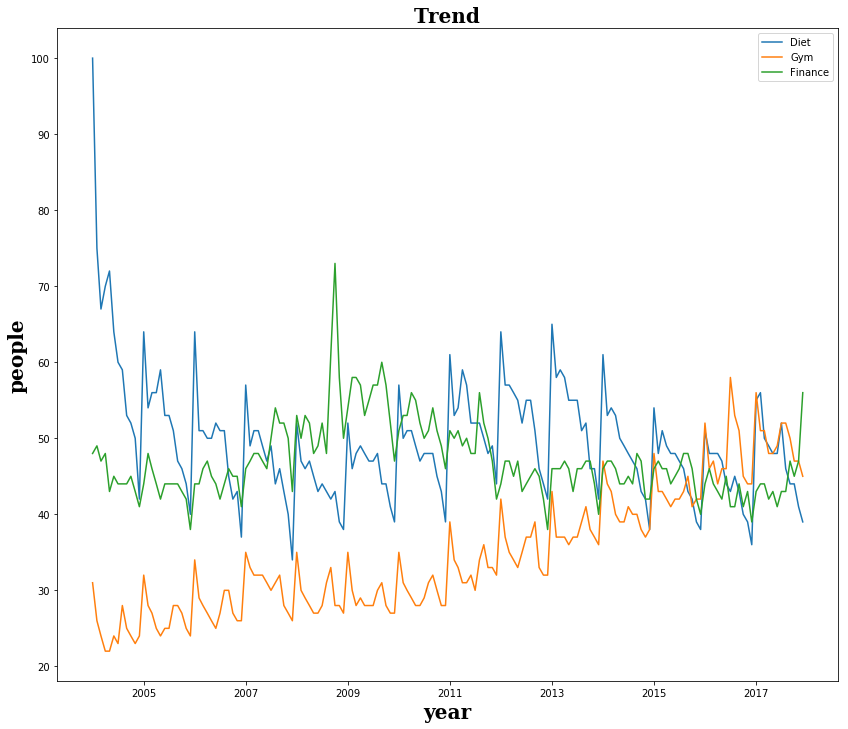

In [44]:
plt.figure(figsize=(14,12))
plt.plot(trend.Diet)
plt.plot(trend.Gym)
plt.plot(trend.Finance)
font = {'family': 'serif',
        'weight': 'bold',
        'size': 20,
        }
plt.xlabel('year', fontdict = font)
plt.ylabel('people', fontdict = font)
plt.legend(loc='best')
plt.title('Trend', fontdict = font)
plt.savefig('AllTrend.png')
plt.show()

### Smoothe the data, to see the trend in data. 

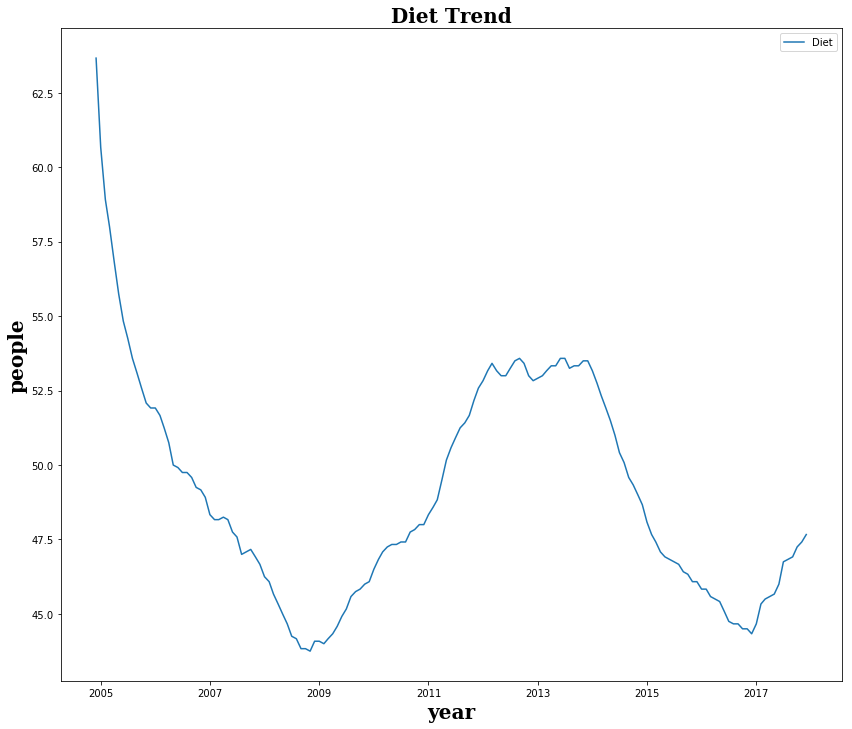

In [45]:
plt.figure(figsize=(14,12))
plt.plot(trend.Diet.rolling(12).mean())
font = {'family': 'serif',
        'weight': 'bold',
        'size': 20,
        }
plt.xlabel('year', fontdict = font)
plt.ylabel('people', fontdict = font)
plt.legend(loc='best')
plt.title('Diet Trend', fontdict = font)
plt.savefig('Diet Trend.png')
plt.show()

### Repeat the smoothing procedure for Gym, Finance

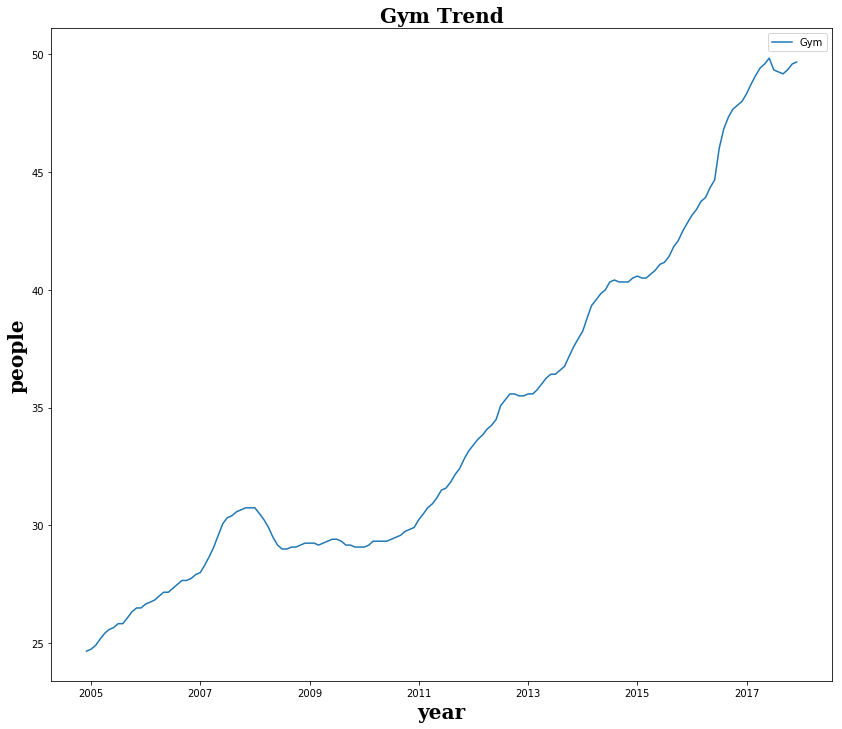

In [46]:
plt.figure(figsize=(14,12))
plt.plot(trend.Gym.rolling(12).mean())
font = {'family': 'serif',
        'weight': 'bold',
        'size': 20,
        }
plt.xlabel('year', fontdict = font)
plt.ylabel('people', fontdict = font)
plt.legend(loc='best')
plt.title('Gym Trend', fontdict = font)
plt.savefig('Gym Trend.png')
plt.show()

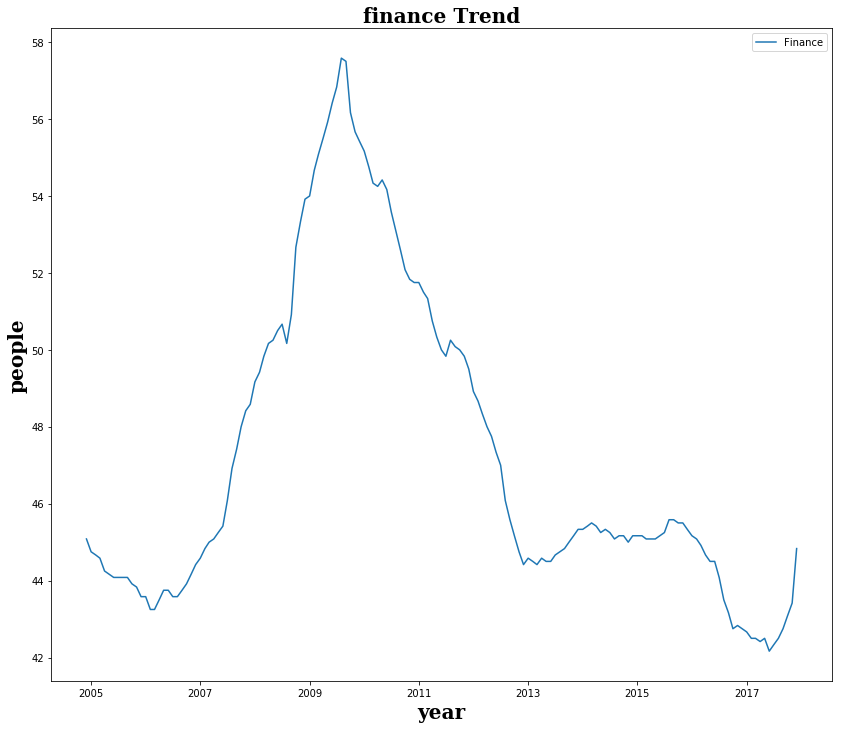

In [47]:
plt.figure(figsize=(14,12))
plt.plot(trend.Finance.rolling(12).mean())
font = {'family': 'serif',
        'weight': 'bold',
        'size': 20,
        }
plt.xlabel('year', fontdict = font)
plt.ylabel('people', fontdict = font)
plt.legend(loc='best')
plt.title('finance Trend', fontdict = font)
plt.savefig('finance Trend.png')
plt.show()

### Compare the trend of Gym and Finance

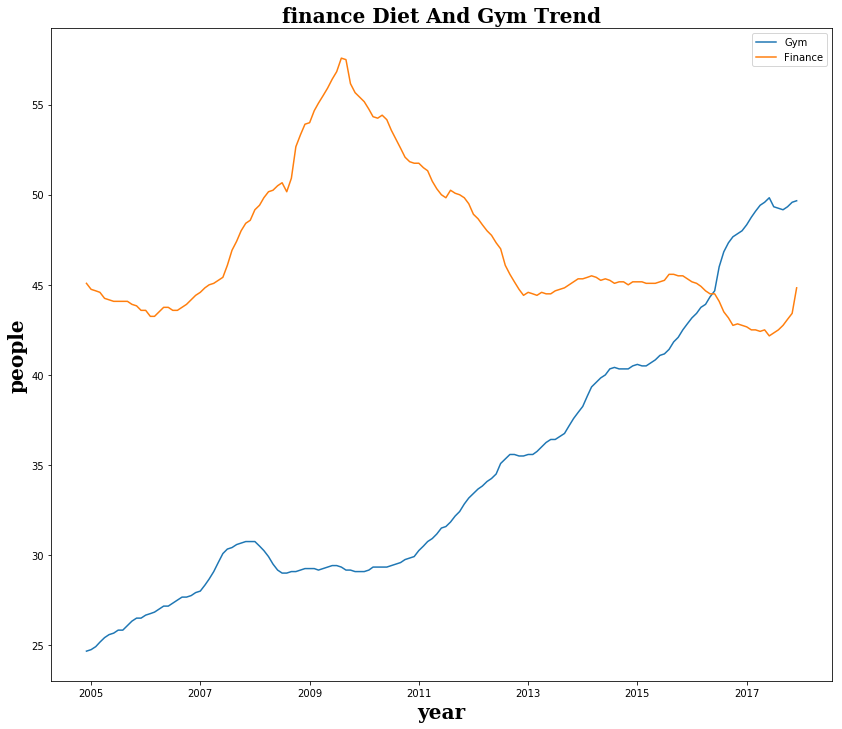

In [48]:
plt.figure(figsize=(14,12))
plt.plot(trend.Gym.rolling(12).mean())

plt.plot(trend.Finance.rolling(12).mean())
font = {'family': 'serif',
        'weight': 'bold',
        'size': 20,
        }
plt.xlabel('year', fontdict = font)
plt.ylabel('people', fontdict = font)
plt.legend(loc='best')
plt.title('finance Diet And Gym Trend', fontdict = font)
plt.savefig('finance Diet And Gym Trend.png')
plt.show()

# Exploratory Data Analysis


# Naive Analysis on Diet 

In [49]:
training_set=trend.loc[:'2012-06-01']
training_set.tail()


,Diet,Gym,Finance
Month,,,
2012-02-01,57,37,47
2012-03-01,57,35,47
2012-04-01,56,34,45
2012-05-01,55,33,47
2012-06-01,52,35,43


In [50]:
test_set=trend.loc['2012-07-01':]
test_set.head()
test_set.shape[0]


66

In [51]:
naive_diet=training_set.Diet.iloc[-1]
naive_gym=training_set.Gym.iloc[-1]

naive_finance=training_set.Finance.iloc[-1]

In [52]:
naive_list=[naive_diet for i in range(0,test_set.shape[0])]
# naive_list=pd.to_datetime(naive_list)
naive_gym_list=[naive_gym for i in range(0,test_set.shape[0])]
naive_finance_list=[naive_finance for i in range(0,test_set.shape[0])]

len(naive_gym_list)

66

In [53]:
naive_df=test_set.copy()
naive_df['prediction']=naive_list
# naive_df.shape[0]
naive_df.head()

,Diet,Gym,Finance,prediction
Month,,,,
2012-07-01,55,37,44,52
2012-08-01,55,37,45,52
2012-09-01,51,39,46,52
2012-10-01,46,33,45,52
2012-11-01,44,32,42,52


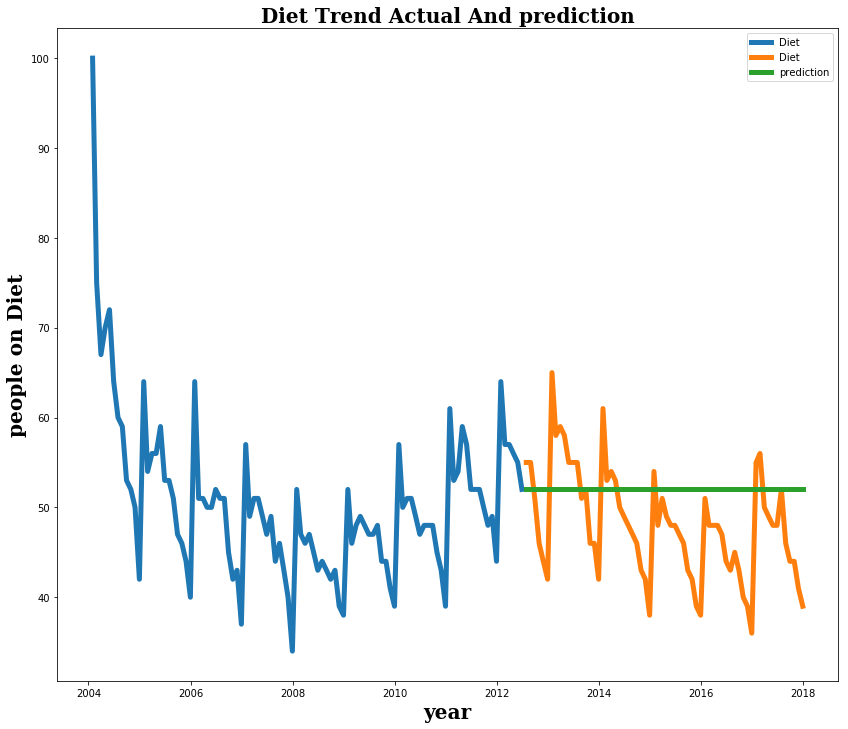

In [54]:
plt.figure(figsize=(14,12))
plt.plot(training_set.Diet.resample('M').mean(), linewidth=5)
plt.plot(test_set.Diet.resample('M').mean(), linewidth=5)
plt.plot(naive_df.prediction.resample('M').mean(), linewidth=5)
font = {'family': 'serif',
        'weight': 'bold',
        'size': 20,
        }
plt.xlabel('year', fontdict = font)
plt.ylabel('people on Diet', fontdict=font)
plt.legend(loc='best')
plt.title('Diet Trend Actual And prediction', fontdict = font)
plt.savefig('Diet Trend Actual And prediction.png')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

In [56]:
rms_diet = sqrt(mean_squared_error( test_set.Diet,naive_df.prediction))
rms_diet


7.149909937979088

# EDA on Gym

In [57]:
gym_df=test_set.copy()
gym_df['prediction']=naive_gym
gym_df.head()

,Diet,Gym,Finance,prediction
Month,,,,
2012-07-01,55,37,44,35
2012-08-01,55,37,45,35
2012-09-01,51,39,46,35
2012-10-01,46,33,45,35
2012-11-01,44,32,42,35


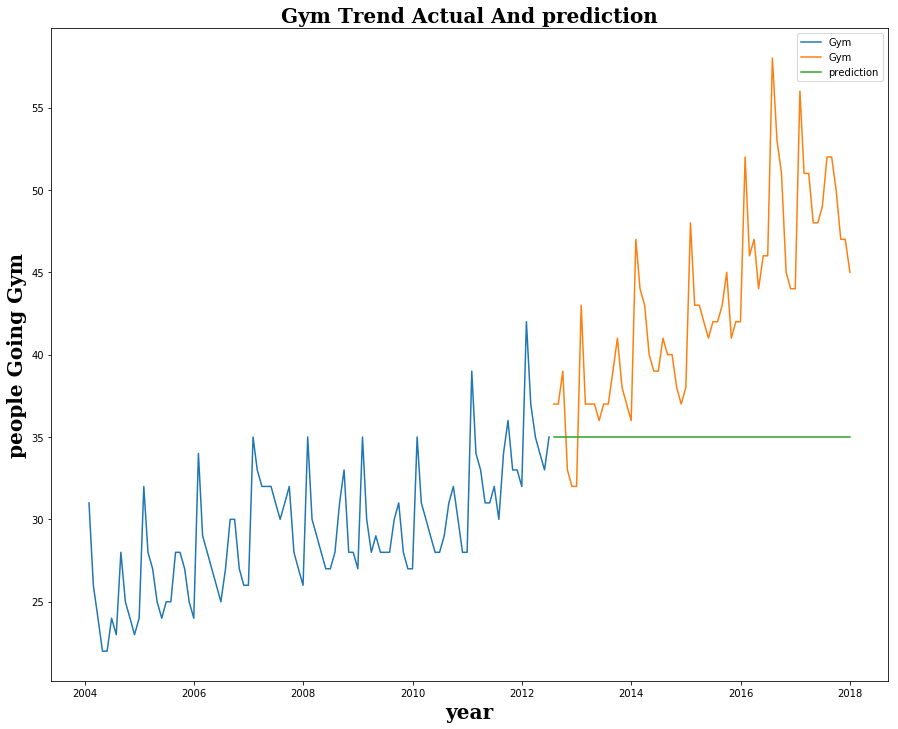

In [58]:
plt.figure(figsize=(15,12))
plt.plot(training_set.Gym.resample('M').mean())
plt.plot(test_set.Gym.resample('M').mean())
plt.plot(gym_df.prediction.resample('M').mean())
font = {'family': 'serif',
        'weight': 'bold',
        'size': 20,
        }
plt.xlabel('year', fontdict = font)
plt.ylabel('people Going Gym', fontdict = font)
plt.legend(loc='best')
plt.title('Gym Trend Actual And prediction', fontdict = font)
plt.savefig('Gym Trend Actual And prediction.png')
plt.show()

In [59]:
rms_gym = sqrt(mean_squared_error( test_set.Gym,gym_df.prediction))
rms_gym

9.812638727064131

# EDA for Finance

In [60]:
finance_df=test_set.copy()
finance_df['prediction']=naive_finance
finance_df.head()

,Diet,Gym,Finance,prediction
Month,,,,
2012-07-01,55,37,44,43
2012-08-01,55,37,45,43
2012-09-01,51,39,46,43
2012-10-01,46,33,45,43
2012-11-01,44,32,42,43


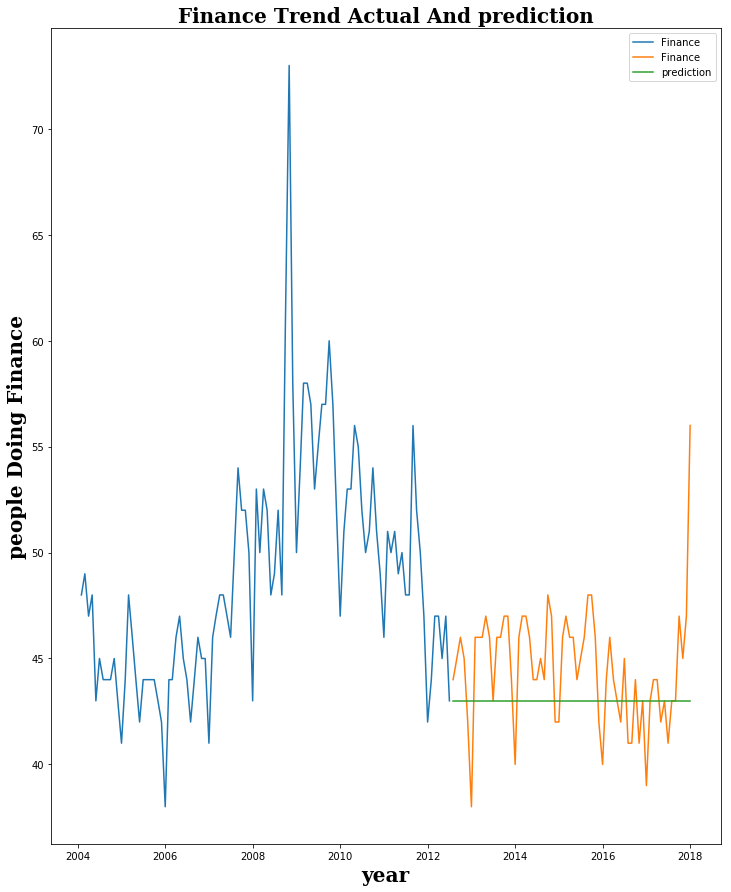

In [61]:
plt.figure(figsize=(12,15))
plt.plot(training_set.Finance.resample('M').mean())
plt.plot(test_set.Finance.resample('M').mean())
plt.plot(finance_df.prediction.resample('M').mean())
font = {'family': 'serif',
        'weight': 'bold',
        'size': 20,
        }
plt.xlabel('year', fontdict = font)
plt.ylabel('people Doing Finance', fontdict = font)
plt.legend(loc='best')
plt.title('Finance Trend Actual And prediction', fontdict = font)
plt.savefig('Finance Trend Actual And prediction.png')
plt.show()

In [62]:
rms_finance = sqrt(mean_squared_error( test_set.Finance,finance_df.prediction))
rms_finance

3.111562016386333